C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-

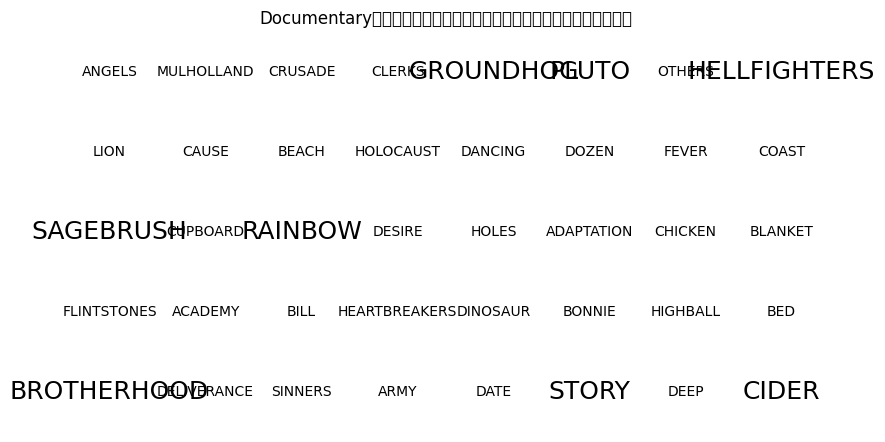

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

def doc_title_wordcloud_like(
    category_csv="csv_exports/category.csv",
    film_category_csv="csv_exports/film_category.csv",
    film_csv="csv_exports/film.csv",
    top_k=40,
    figsize=(8, 4),
):
    # データ読み込み
    df_cat = pd.read_csv(category_csv)
    df_fc  = pd.read_csv(film_category_csv)
    df_f   = pd.read_csv(film_csv)

    # DocumentaryカテゴリのID
    doc_id = df_cat.loc[df_cat["name"]=="Documentary","category_id"].values[0]

    # Documentaryに属するfilm_id群
    doc_film_ids = set(df_fc.loc[df_fc["category_id"]==doc_id, "film_id"])
    titles = df_f.loc[df_f["film_id"].isin(doc_film_ids), "title"].tolist()

    # タイトル→単語頻度
    text = " ".join(titles).upper()
    tokens = re.findall(r"[A-Z][A-Z']+", text)

    # 簡易ストップワード除去
    stop = {
        "THE","A","AN","OF","AND","TO","IN","ON","AT","FOR","WITH","BY","FROM","AS",
        "IS","ARE","BE","OR","NOT","NO","ALL","NEW","OLD","MY","YOUR","OUR","OUT",
        "OVER","UNDER","INTO","UP","DOWN","OFF","IT","ITS","THIS","THAT","THESE","THOSE",
        "I","YOU","HE","SHE","WE","THEY","HIS","HER","HERS","HIM","THEM","ME",
        "ONE","ONCE","TWICE"
    }
    tokens = [t for t in tokens if len(t)>=3 and t not in stop]
    counts = Counter(tokens).most_common(top_k)
    if not counts:
        print("有効な単語がありません。")
        return

    words, freqs = zip(*counts)

    # フォントサイズへ変換
    fmin, fmax = 10, 18
    cmin, cmax = min(freqs), max(freqs)
    sizes = [ (fmin+fmax)//2 ]*len(freqs) if cmin==cmax else \
            [ fmin + (fmax-fmin)*(f-cmin)/(cmax-cmin) for f in freqs ]

    # グリッド配置（簡易版）
    n = len(words)
    cols = 8 if n>=32 else 6 if n>=18 else 4
    rows = int(np.ceil(n/cols))
    xs = np.linspace(0.08, 0.92, cols)
    ys = np.linspace(0.9, 0.1, rows)
    grid = [(x,y) for y in ys for x in xs]

    rng = np.random.default_rng(42)
    idx = rng.permutation(len(grid))[:n]
    pts = [grid[i] for i in idx]

    # 描画
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlim(0,1); ax.set_ylim(0,1); ax.axis("off")
    for (w,s),(x,y) in zip(zip(words,sizes), pts):
        ax.text(x, y, w, fontsize=float(s), ha="center", va="center")
    plt.title("Documentaryカテゴリのタイトルから作成したワードクラウド風可視化")
    plt.show()

# 実行例
doc_title_wordcloud_like()


C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-

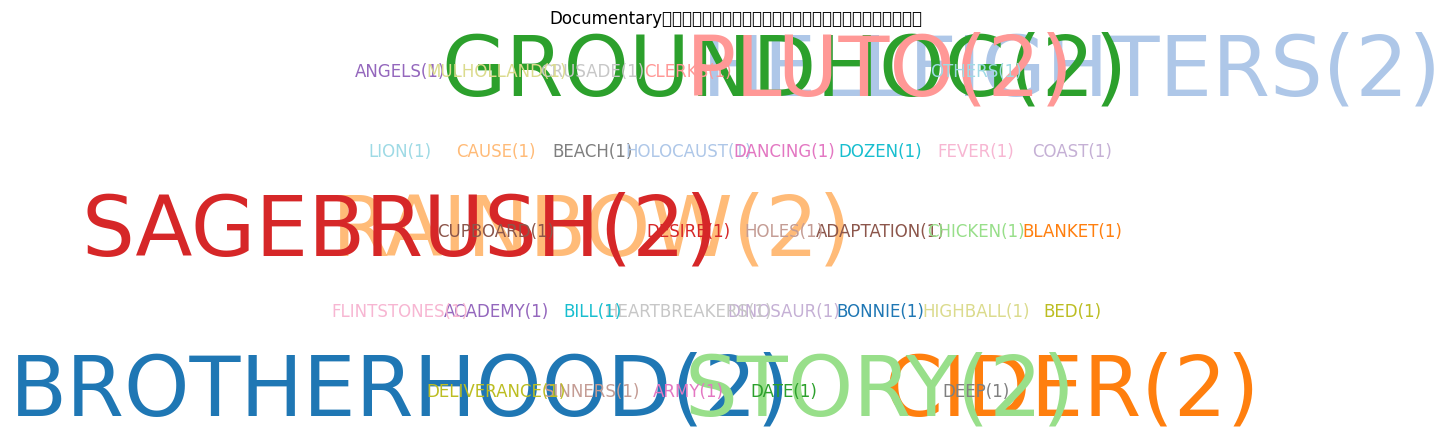

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

def doc_title_wordcloud_like(
    category_csv="csv_exports/category.csv",
    film_category_csv="csv_exports/film_category.csv",
    film_csv="csv_exports/film.csv",
    top_k=40,
    figsize=(8, 4),
    seed=42
):
    # データ読み込み
    df_cat = pd.read_csv(category_csv)
    df_fc  = pd.read_csv(film_category_csv)
    df_f   = pd.read_csv(film_csv)

    # DocumentaryカテゴリのID
    doc_id = df_cat.loc[df_cat["name"]=="Documentary","category_id"].values[0]

    # Documentaryに属するfilm_id群
    doc_film_ids = set(df_fc.loc[df_fc["category_id"]==doc_id, "film_id"])
    titles = df_f.loc[df_f["film_id"].isin(doc_film_ids), "title"].tolist()

    # タイトル→単語頻度
    text = " ".join(titles).upper()
    tokens = re.findall(r"[A-Z][A-Z']+", text)

    # 簡易ストップワード除去
    stop = {
        "THE","A","AN","OF","AND","TO","IN","ON","AT","FOR","WITH","BY","FROM","AS",
        "IS","ARE","BE","OR","NOT","NO","ALL","NEW","OLD","MY","YOUR","OUR","OUT",
        "OVER","UNDER","INTO","UP","DOWN","OFF","IT","ITS","THIS","THAT","THESE","THOSE",
        "I","YOU","HE","SHE","WE","THEY","HIS","HER","HERS","HIM","THEM","ME",
        "ONE","ONCE","TWICE"
    }
    tokens = [t for t in tokens if len(t)>=3 and t not in stop]
    counts = Counter(tokens).most_common(top_k)
    if not counts:
        print("有効な単語がありません。")
        return

    words, freqs = zip(*counts)

    # フォントサイズへ変換
    fmin, fmax = 12, 60
    cmin, cmax = min(freqs), max(freqs)
    sizes = [ (fmin+fmax)//2 ]*len(freqs) if cmin==cmax else \
            [ fmin + (fmax-fmin)*(f-cmin)/(cmax-cmin) for f in freqs ]

    # グリッド配置
    n = len(words)
    cols = 8 if n>=32 else 6 if n>=18 else 4
    rows = int(np.ceil(n/cols))
    xs = np.linspace(0.08, 0.92, cols)
    ys = np.linspace(0.9, 0.1, rows)
    grid = [(x,y) for y in ys for x in xs]

    rng = np.random.default_rng(seed)
    idx = rng.permutation(len(grid))[:n]
    pts = [grid[i] for i in idx]

    # カラーマップ
    cmap = plt.cm.tab20
    colors = [cmap(i % 20) for i in range(n)]

    # 描画
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlim(0,1); ax.set_ylim(0,1); ax.axis("off")

    for (w,s,f),(x,y),color in zip(zip(words,sizes,freqs), pts, colors):
        ax.text(x, y, f"{w}({f})", fontsize=float(s),
                color=color, ha="center", va="center")

    plt.title("Documentaryカテゴリのタイトルから作成したワードクラウド風可視化")
    plt.show()

# 実行例
doc_title_wordcloud_like()


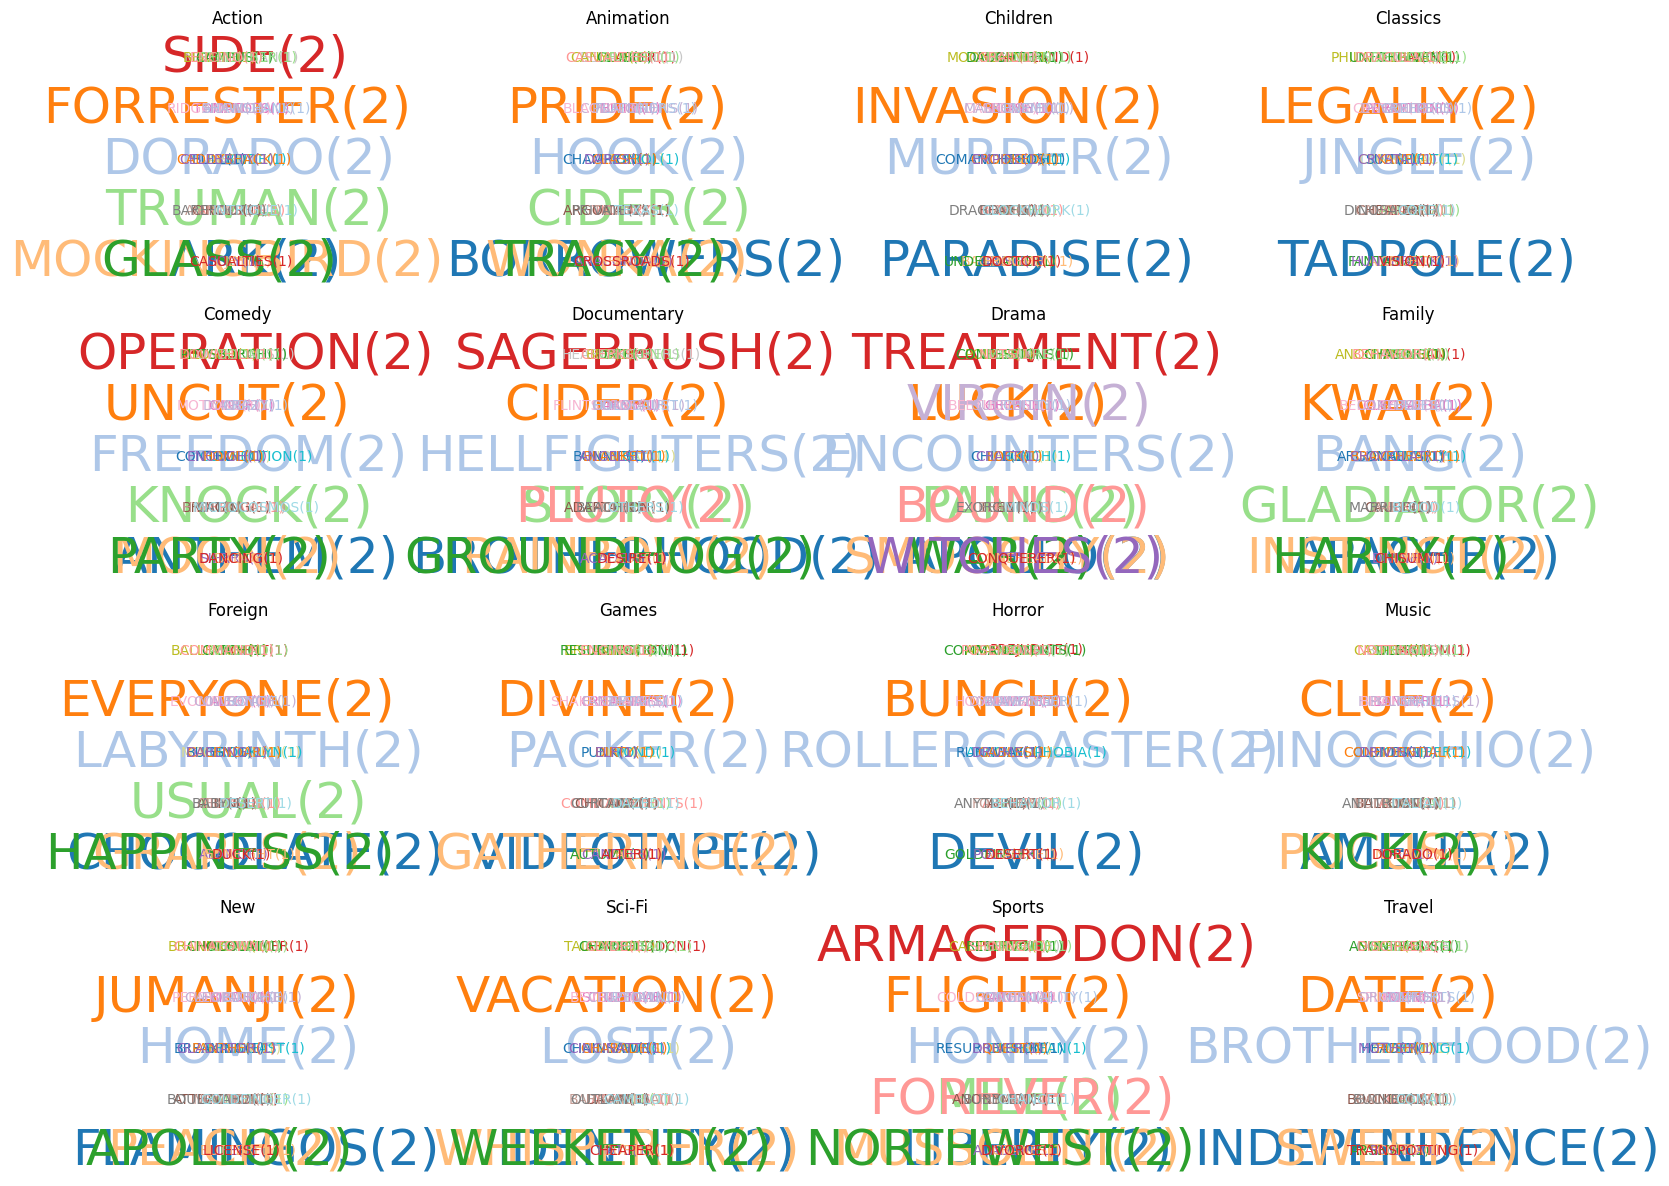

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

def wordcloud_from_titles(titles, top_k=30, seed=42):
    """映画タイトルのリストから単語頻度を集計してワードクラウド用データを返す"""
    text = " ".join(titles).upper()
    tokens = re.findall(r"[A-Z][A-Z']+", text)
    stop = {
        "THE","A","AN","OF","AND","TO","IN","ON","AT","FOR","WITH","BY","FROM","AS",
        "IS","ARE","BE","OR","NOT","NO","ALL","NEW","OLD","MY","YOUR","OUR","OUT",
        "OVER","UNDER","INTO","UP","DOWN","OFF","IT","ITS","THIS","THAT","THESE","THOSE",
        "I","YOU","HE","SHE","WE","THEY","HIS","HER","HERS","HIM","THEM","ME",
        "ONE","ONCE","TWICE"
    }
    tokens = [t for t in tokens if len(t)>=3 and t not in stop]
    counts = Counter(tokens).most_common(top_k)
    return counts

def plot_wordcloud(counts, title, ax, seed=42):
    """単語頻度データをワードクラウド風に描画"""
    if not counts:
        ax.set_title(title + " (no data)")
        ax.axis("off")
        return
    words, freqs = zip(*counts)

    # フォントサイズ
    fmin, fmax = 10, 36
    cmin, cmax = min(freqs), max(freqs)
    sizes = [ (fmin+fmax)//2 ]*len(freqs) if cmin==cmax else \
            [ fmin + (fmax-fmin)*(f-cmin)/(cmax-cmin) for f in freqs ]

    # グリッド配置
    n = len(words)
    cols = int(np.ceil(np.sqrt(n)))
    rows = int(np.ceil(n/cols))
    xs = np.linspace(0.1, 0.9, cols)
    ys = np.linspace(0.9, 0.1, rows)
    grid = [(x,y) for y in ys for x in xs]
    rng = np.random.default_rng(seed)
    idx = rng.permutation(len(grid))[:n]
    pts = [grid[i] for i in idx]

    cmap = plt.cm.tab20
    colors = [cmap(i % 20) for i in range(n)]

    ax.set_xlim(0,1); ax.set_ylim(0,1); ax.axis("off")
    for (w,s,f),(x,y),color in zip(zip(words,sizes,freqs), pts, colors):
        ax.text(x, y, f"{w}({f})", fontsize=float(s),
                color=color, ha="center", va="center")
    ax.set_title(title)

def all_categories_wordclouds(category_csv="csv_exports/category.csv",
                              film_category_csv="csv_exports/film_category.csv",
                              film_csv="csv_exports/film.csv",
                              top_k=30):
    # データ読み込み
    df_cat = pd.read_csv(category_csv)
    df_fc  = pd.read_csv(film_category_csv)
    df_f   = pd.read_csv(film_csv)

    # 各カテゴリごとにタイトルを収集
    n_cat = len(df_cat)
    fig, axes = plt.subplots(int(np.ceil(n_cat/4)), 4,
                             figsize=(16, 3*int(np.ceil(n_cat/4))))
    axes = axes.flatten()

    for i, row in df_cat.iterrows():
        cid, cname = row["category_id"], row["name"]
        film_ids = set(df_fc.loc[df_fc["category_id"]==cid, "film_id"])
        titles = df_f.loc[df_f["film_id"].isin(film_ids), "title"].tolist()
        counts = wordcloud_from_titles(titles, top_k=top_k)
        plot_wordcloud(counts, cname, axes[i])

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# 実行例
all_categories_wordclouds()


C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26144 (\N{CJK UNIFIED IDEOGRAPH-6620}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

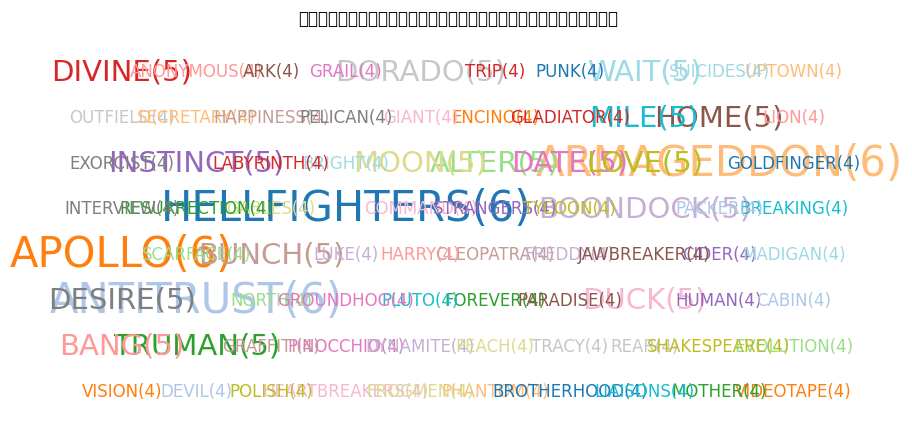

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

def all_titles_wordcloud_like(
    film_csv="csv_exports/film.csv",
    top_k=80,            # 表示する上位ワード数
    figsize=(8, 4),      # 画像サイズ
    seed=42              # レイアウト乱数の固定種
):
    # すべての映画タイトルを読み込み
    df_film = pd.read_csv(film_csv)
    titles = df_film["title"].dropna().astype(str).tolist()

    # タイトルを単語に分解（英大文字・アポストロフィのみ対象）
    text = " ".join(titles).upper()
    tokens = re.findall(r"[A-Z][A-Z']+", text)

    # 簡易ストップワード
    stop = {
        "THE","A","AN","OF","AND","TO","IN","ON","AT","FOR","WITH","BY","FROM","AS",
        "IS","ARE","BE","OR","NOT","NO","ALL","NEW","OLD","MY","YOUR","OUR","OUT",
        "OVER","UNDER","INTO","UP","DOWN","OFF","IT","ITS","THIS","THAT","THESE","THOSE",
        "I","YOU","HE","SHE","WE","THEY","HIS","HER","HERS","HIM","THEM","ME",
        "ONE","ONCE","TWICE"
    }
    tokens = [t for t in tokens if len(t) >= 3 and t not in stop]

    # 頻度集計
    counts = Counter(tokens).most_common(top_k)
    if not counts:
        print("有効な単語がありません。")
        return

    words, freqs = zip(*counts)

    # フォントサイズへスケーリング
    fmin, fmax = 12, 30
    cmin, cmax = min(freqs), max(freqs)
    sizes = [ (fmin+fmax)//2 ] * len(freqs) if cmin == cmax else \
            [ fmin + (fmax - fmin) * (f - cmin) / (cmax - cmin) for f in freqs ]

    # グリッド配置（重なり回避の簡易版）
    n = len(words)
    cols = 10 if n >= 80 else 8 if n >= 60 else 6 if n >= 36 else 4
    rows = int(np.ceil(n / cols))
    xs = np.linspace(0.08, 0.92, cols)
    ys = np.linspace(0.9, 0.1, rows)
    grid = [(x, y) for y in ys for x in xs]

    rng = np.random.default_rng(seed)
    idx = rng.permutation(len(grid))[:n]
    pts = [grid[i] for i in idx]

    # カラー割り当て（カテゴリ横断なので均等色）
    cmap = plt.cm.tab20
    colors = [cmap(i % 20) for i in range(n)]

    # 描画
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.axis("off")

    for (w, s, f), (x, y), color in zip(zip(words, sizes, freqs), pts, colors):
        ax.text(x, y, f"{w}({f})",
                fontsize=float(s), color=color,
                ha="center", va="center")

    plt.title("全映画タイトルから作成したワードクラウド風可視化（色＋回数表示）")
    plt.show()

# 実行例
all_titles_wordcloud_like(top_k=80, figsize=(8, 4))


C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26144 (\N{CJK UNIFIED IDEOGRAPH-6620}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

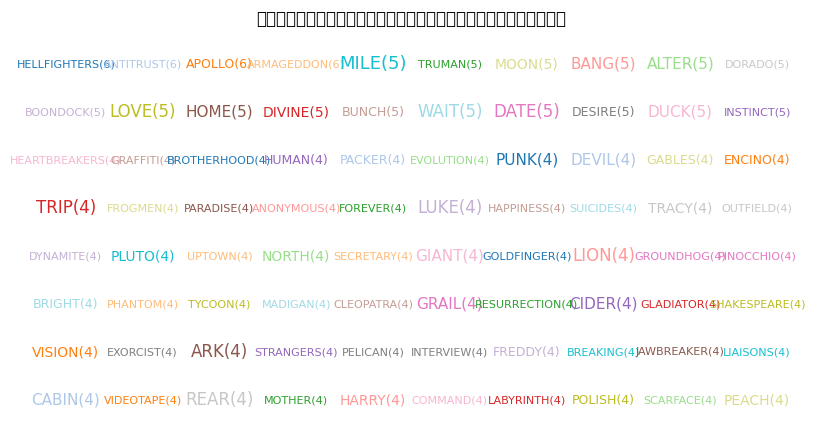

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

def _fit_fontsize_in_cell(ax, text, target_fs, ax_cell_xywh, margin=0.9, min_fs=8):
    """
    ax_cell_xywh: (x0, y0, w, h) in Axes (0-1) coords
    二分探索でフォントサイズを下げ、セル内(幅w, 高さh)に収まるまで調整。
    """
    x0, y0, w, h = ax_cell_xywh
    cx, cy = x0 + w/2, y0 + h/2

    lo, hi = min_fs, target_fs
    best = min_fs
    # display座標でのセルサイズ
    p0 = ax.transAxes.transform((x0, y0))
    p1 = ax.transAxes.transform((x0 + w, y0 + h))
    cell_w_px = (p1[0] - p0[0]) * margin
    cell_h_px = (p1[1] - p0[1]) * margin

    # テキストArtist（都度フォントサイズ更新）
    t = ax.text(cx, cy, text, fontsize=target_fs, ha="center", va="center")
    fig = ax.figure
    renderer = fig.canvas.get_renderer()

    # まず描画（レンダラが必要）
    fig.canvas.draw()

    # 二分探索
    while lo <= hi:
        mid = (lo + hi) // 2
        t.set_fontsize(mid)
        fig.canvas.draw()
        bbox = t.get_window_extent(renderer=renderer)
        tw, th = bbox.width, bbox.height
        if tw <= cell_w_px and th <= cell_h_px:
            best = mid
            lo = mid + 1
        else:
            hi = mid - 1

    t.set_fontsize(best)
    return t, best

def all_titles_wordcloud_like_no_overlap(
    film_csv="csv_exports/film.csv",
    top_k=80,
    figsize=(8, 4),
    seed=42,
    use_color=True,     # 色付けするなら True
    show_counts=True    # 出現回数も表示するなら True
):
    # タイトル収集
    df = pd.read_csv(film_csv)
    titles = df["title"].dropna().astype(str).tolist()

    # トークン化（英大文字＋アポストロフィ）
    text = " ".join(titles).upper()
    tokens = re.findall(r"[A-Z][A-Z']+", text)

    stop = {
        "THE","A","AN","OF","AND","TO","IN","ON","AT","FOR","WITH","BY","FROM","AS",
        "IS","ARE","BE","OR","NOT","NO","ALL","NEW","OLD","MY","YOUR","OUR","OUT",
        "OVER","UNDER","INTO","UP","DOWN","OFF","IT","ITS","THIS","THAT","THESE","THOSE",
        "I","YOU","HE","SHE","WE","THEY","HIS","HER","HERS","HIM","THEM","ME",
        "ONE","ONCE","TWICE"
    }
    tokens = [t for t in tokens if len(t) >= 3 and t not in stop]
    counts = Counter(tokens).most_common(top_k)
    if not counts:
        print("有効な単語がありません。")
        return

    words, freqs = zip(*counts)

    # フォントサイズ（目標値）
    fmin, fmax = 12, 64
    cmin, cmax = min(freqs), max(freqs)
    target_sizes = [ (fmin+fmax)//2 ] * len(freqs) if cmin == cmax else \
                   [ fmin + (fmax - fmin) * (f - cmin) / (cmax - cmin) for f in freqs ]

    # グリッド（1セル=1ワード）
    n = len(words)
    cols = 10 if n >= 80 else 8 if n >= 60 else 6 if n >= 36 else 4
    rows = int(np.ceil(n / cols))
    xs = np.linspace(0.02, 0.98, cols + 1)  # セルの境界（余白広め）
    ys = np.linspace(0.98, 0.02, rows + 1)

    # セル一覧（(x0,y0,w,h) in Axes coords）
    cells = []
    for r in range(rows):
        for c in range(cols):
            x0, x1 = xs[c], xs[c+1]
            y1, y0 = ys[r], ys[r+1]  # 上→下
            cells.append((x0, y0, x1 - x0, y1 - y0))
    cells = cells[:n]

    # 配置順を少しランダム化（見栄え用）
    rng = np.random.default_rng(seed)
    order = list(range(n))
    rng.shuffle(order)

    # 描画
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.axis("off")

    cmap = plt.cm.tab20
    colors = [cmap(i % 20) for i in range(n)] if use_color else [None]*n

    # 大きい語ほど先に置くとフィットしやすい
    big_first = sorted(order, key=lambda i: target_sizes[i], reverse=True)

    for i, cell in zip(big_first, cells):
        label = f"{words[i]}({freqs[i]})" if show_counts else words[i]
        color = colors[i] if use_color else None
        t, fitted = _fit_fontsize_in_cell(
            ax, label, target_sizes[i], cell, margin=0.9, min_fs=8
        )
        if color is not None:
            t.set_color(color)

    plt.title("全映画タイトルのワードクラウド風（重なり回避・セル内フィット）")
    plt.show()

# 実行例
all_titles_wordcloud_like_no_overlap(top_k=80, figsize=(8, 4), use_color=True, show_counts=True)
